In [21]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score

In [22]:
#loading Data
df=pd.read_csv('water_potability.csv')

In [23]:
#Data Describe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [24]:
#Check for NA
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [25]:
#Fill na with col mean
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
print(df.shape)
df.isna().sum()

(3276, 10)


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Visualize

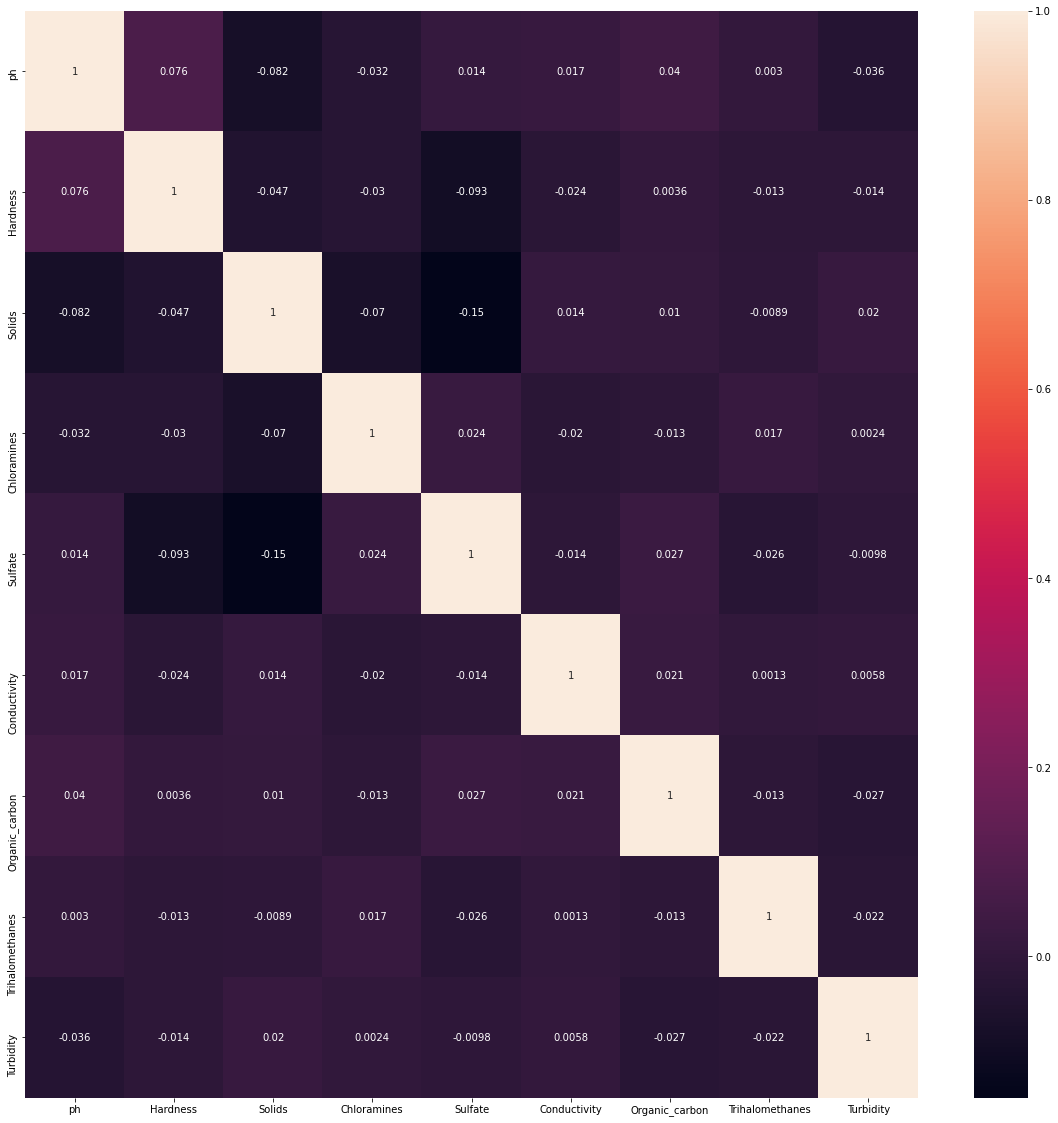

In [26]:
#Correlation Matrix
plt.figure(figsize=(20,20))
corrMatrix = df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

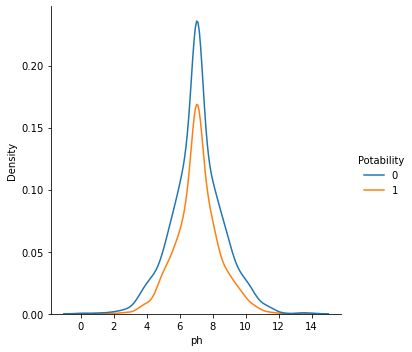

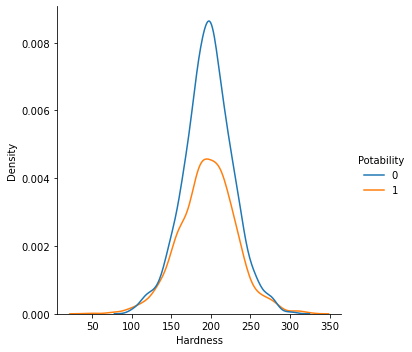

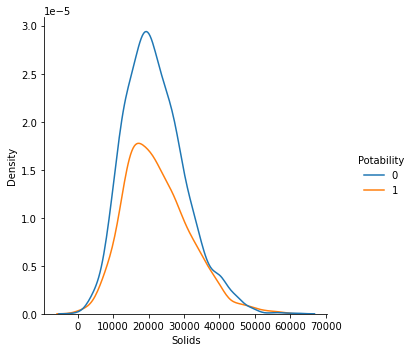

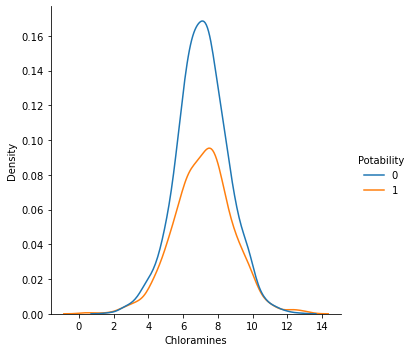

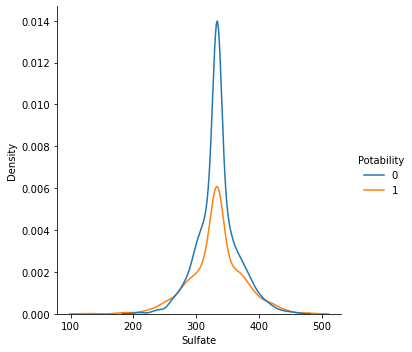

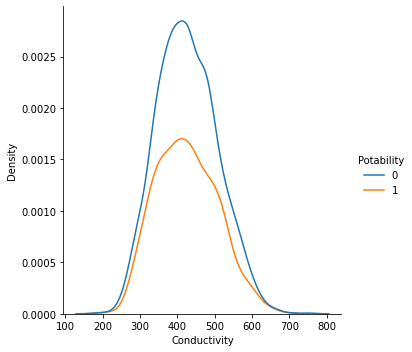

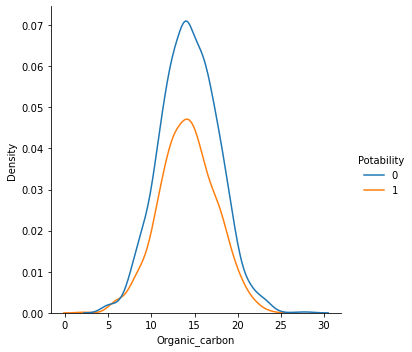

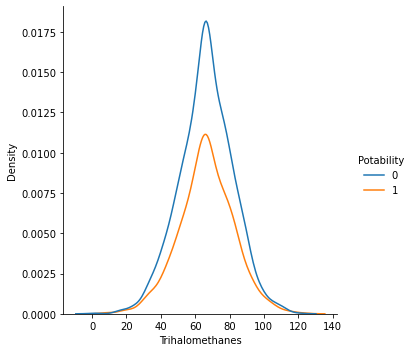

In [27]:
#Distplots by Potability
for i in df.columns[0:8]:
    sn.displot(data=df, x=i, hue='Potability', kind='kde')

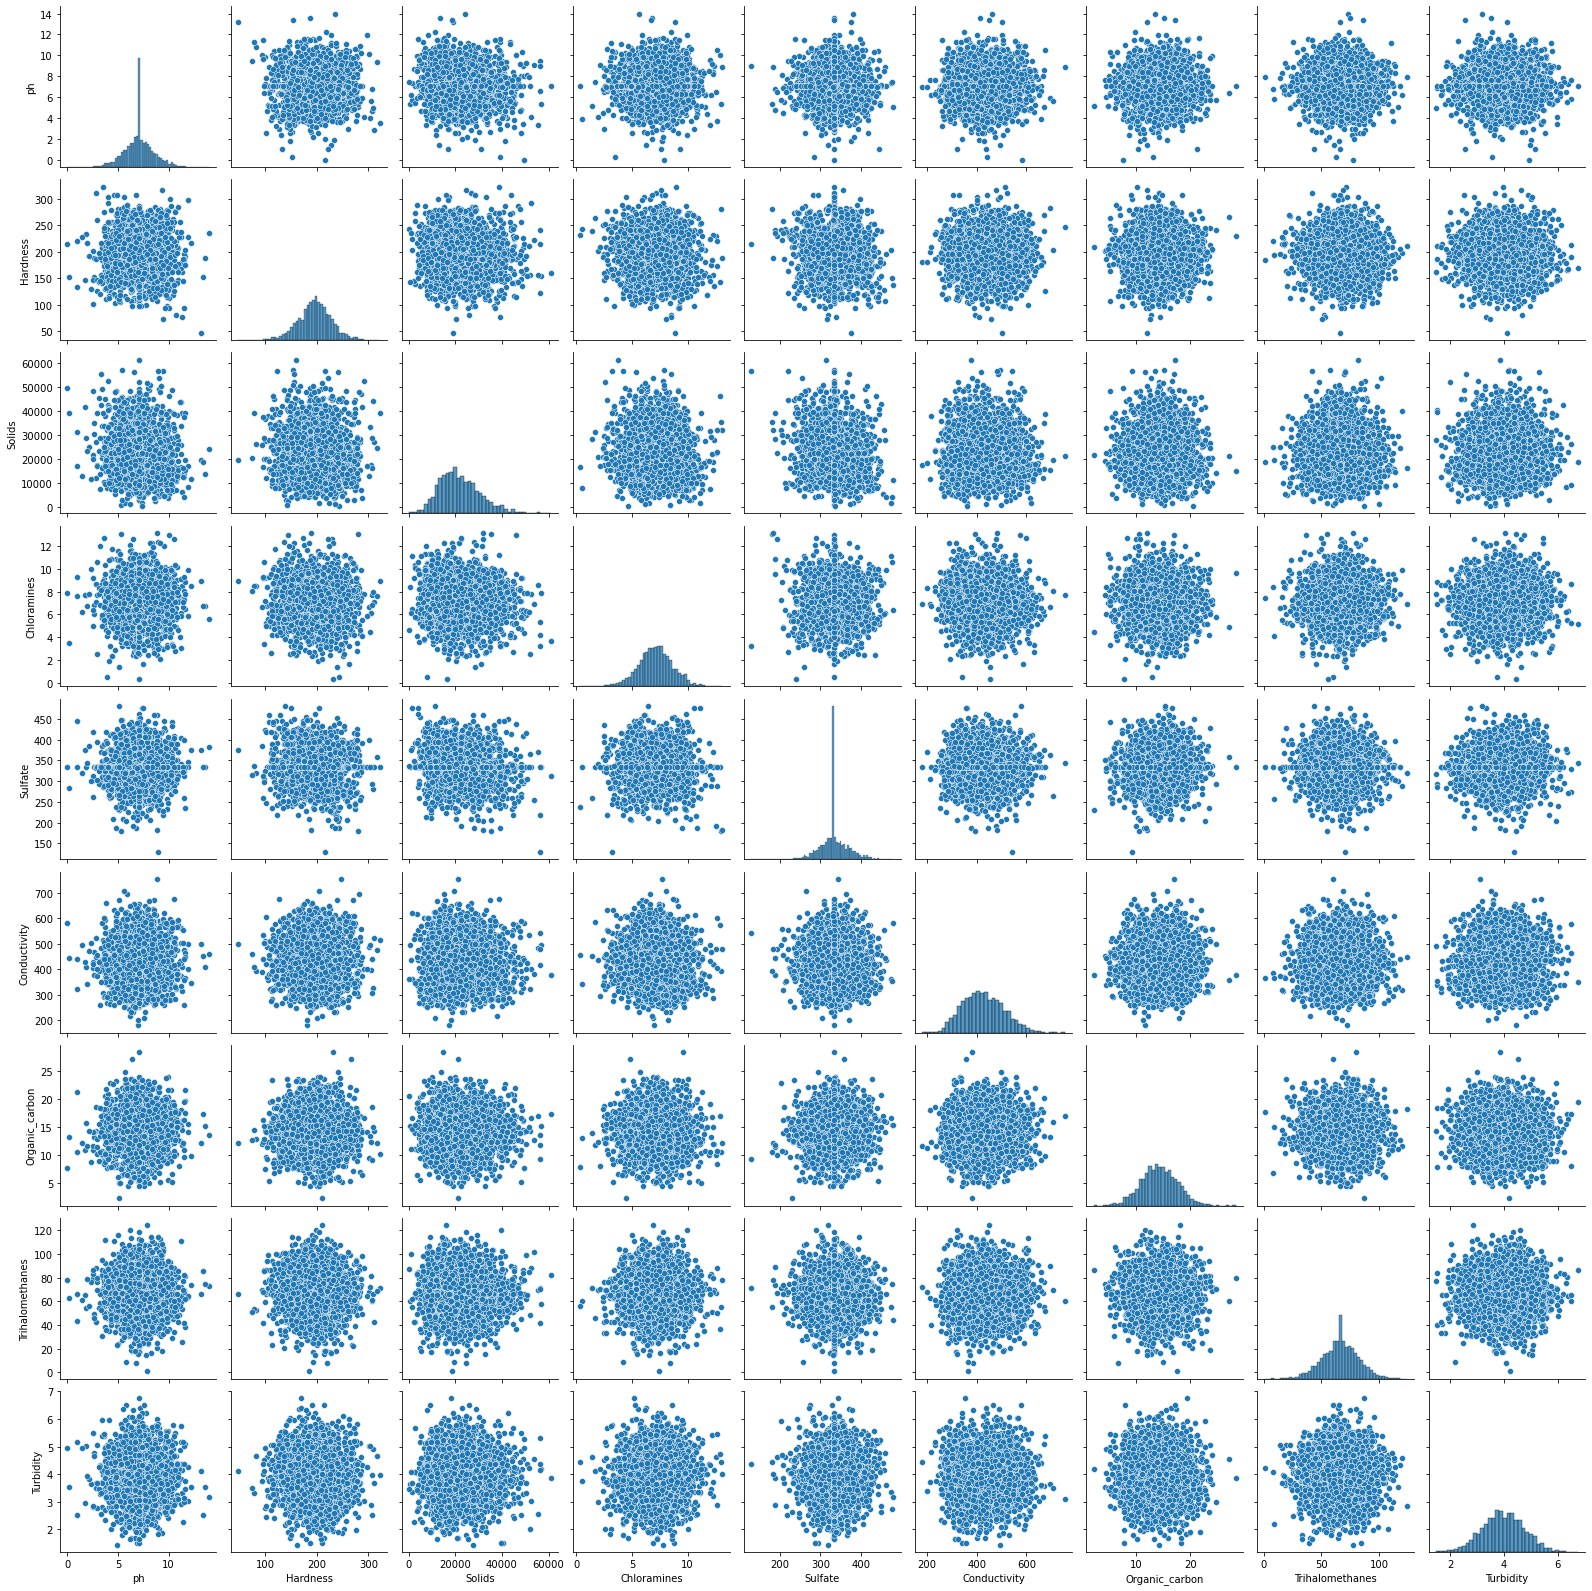

In [28]:
#Plot of all variables
sn.pairplot(data=df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']])

<AxesSubplot:ylabel='Potability'>

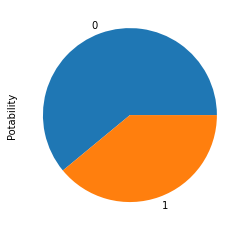

In [29]:
#Potability distrubtion
df['Potability'] = df['Potability'].astype('category')
df['Potability'].value_counts().plot.pie()

# Modeling

In [30]:
#Create train and test datasets
x=df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Potability=df['Potability']
X_train, X_test, y_train, y_test = split(x, Potability, test_size=0.25, random_state=200)

# Logistic Regression

In [31]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
prediction=clf.predict(X_train)
print(cm(y_train, prediction))
accuracy_score(y_train, prediction)

[[1504    0]
 [ 952    1]]


0.6125356125356125

In [32]:
prediction_test=clf.predict(X_test)
print(cm(y_test, prediction_test))
accuracy_score(y_test, prediction_test)

[[494   0]
 [325   0]]


0.6031746031746031

# Desicion Tree

In [33]:
DTclf = DecisionTreeClassifier(max_depth=5,random_state=0).fit(X_train, y_train)
DTprediction=DTclf.predict(X_train)
print(cm(y_train, DTprediction))
accuracy_score(y_train, DTprediction)

[[1460   44]
 [ 745  208]]


0.6788766788766789

In [34]:
DTprediction_test=DTclf.predict(X_test)
print(cm(y_test, DTprediction_test))
accuracy_score(y_test, DTprediction_test)

[[450  44]
 [267  58]]


0.6202686202686203

# XGBoost

In [35]:
XGclf = GradientBoostingClassifier(n_estimators=15,max_depth=5,random_state=0).fit(X_train, y_train)
XGprediction=XGclf.predict(X_train)
print(cm(y_train, XGprediction))
accuracy_score(y_train, XGprediction)

[[1471   33]
 [ 658  295]]


0.7187627187627188

In [36]:
XGprediction_test=XGclf.predict(X_test)
print(cm(y_test, XGprediction_test))
accuracy_score(y_test, XGprediction_test)

[[463  31]
 [250  75]]


0.6568986568986569

# Prediction

In [38]:
waterPrediction=clf.predict([[5.584086638,188.313323769616,28748.6877390461,7.54486878877965,326.678362911673,280.467915933487,8.39973464015275,54.9178618419944,2.55970822755652]])
print(waterPrediction)
waterPrediction=DTclf.predict([[5.584086638,188.313323769616,28748.6877390461,7.54486878877965,326.678362911673,280.467915933487,8.39973464015275,54.9178618419944,2.55970822755652]])
print(waterPrediction)
waterPrediction=XGclf.predict([[5.584086638,188.313323769616,28748.6877390461,7.54486878877965,326.678362911673,280.467915933487,8.39973464015275,54.9178618419944,2.55970822755652]])
print(waterPrediction)

[0]
[0]
[0]


# Summary

We run 3 models to classify our y. Logistic regression is the simplest model and give us the lowest accuarcy. To avoid Over Fitting in the DT and XGB we set lower hyperparameters (DT-max_depth=5, XGB-n_estimators=15,max_depth=5) and see in the result that we succeeded in avoid it. The best accuarcy is given by the XGB model.